In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('spam.csv', encoding='iso-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [31]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [32]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [33]:
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']

In [34]:
df.rename(columns = {'v1':'ctg', 'v2':'msg'}, inplace = True)

In [35]:
df.shape

(5572, 2)

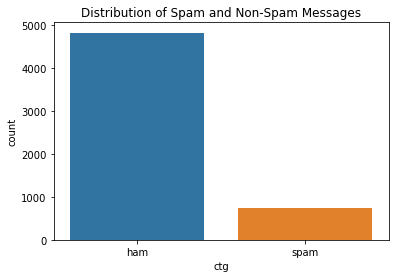

In [36]:
# Visualize the distribution of spam and non-spam messages

sns.countplot(x='ctg', data=df)
plt.title('Distribution of Spam and Non-Spam Messages')
plt.show()

In [37]:
spam = df.groupby('ctg')['msg'].count()
spam

ctg
ham     4825
spam     747
Name: msg, dtype: int64

In [38]:
# Convert the labels to numerical values
df['ctg'] = np.where(df['ctg'] == 'spam', 1, 0)

In [39]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['spam'] = label_encoder.fit_transform(df['ctg'])
df.head()

,ctg,msg,spam
0,0,"Go until jurong point, crazy.. Available only ...",0
1,0,Ok lar... Joking wif u oni...,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,0,U dun say so early hor... U c already then say...,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0


In [40]:
x = df['msg']
y = df['ctg']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.2, random_state = 2)

Apply CountVectorizer : characters and words are not understand bby the machine, it must be represented in the numerical from 

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

In [43]:
# conerting email to number matrix
x_train_count = v.fit_transform(x_train.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

MODEL : Naive Bayes -> MultinomialNB

In [44]:
from sklearn.naive_bayes import MultinomialNB
m = MultinomialNB()

In [45]:
m.fit(x_train_count, y_train)

MultinomialNB()

In [46]:
emails = ['Hey ayush, can we get together to watch cricket match tomorrow?',
    'Upto 40% discount on food products, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
m.predict(emails_count)

array([0, 1])

In [47]:
x_test_count = v.transform(x_test)
m.predict(x_test_count)

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
m.score(x_test_count, y_test)

0.9802690582959641

In [49]:
pred = m.predict(x_test_count)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
con = confusion_matrix(y_test, pred)
con

array([[954,   3],
       [ 19, 139]], dtype=int64)